# Controlling Access Using Access Policies

Access policies specify who has access to AWS resources and what actions they can perform on those resources. Every IAM user starts with no permissions. By default, users can do nothing, not even view their own access keys. When a policy is associated with an identity or resource, it defines the permissions for that identity or resource. These policies and their permissions determine whether a request is allowed or denied. This section focuses on identity and resource-based access policies. 

## Access policies

Access policies dictate who has access to which resources. There are two types of access policies: resource based and identity based. Resource-based policies attach to resources, such as buckets and objects. For example, bucket policies and access control lists (ACLs) are resource-based policies because you attach them directly to resources such as buckets and objects.

Identity policies or IAM policies are access policies attached to users in your account. You might choose to use one type of access policy or a combination of both to manage permissions for your Amazon S3 resources.

The following figure shows examples of access policies. Both the bucket and user policies are written in JSON format. If you review only the code, it may not be immediately apparent which policy is for a user and which policy is for a bucket. However, by looking at what the policy is attached to, you can quickly determine which type of policy it is. In the figure, the resource-based policy is attached to a bucket and allows one user or Principal user/mateo the actions defined in the policy. On the right side, the identity-based policy is attached directly to the user. This policy grants the user the GetObject and PutObject actions to the single reports.jpg object.

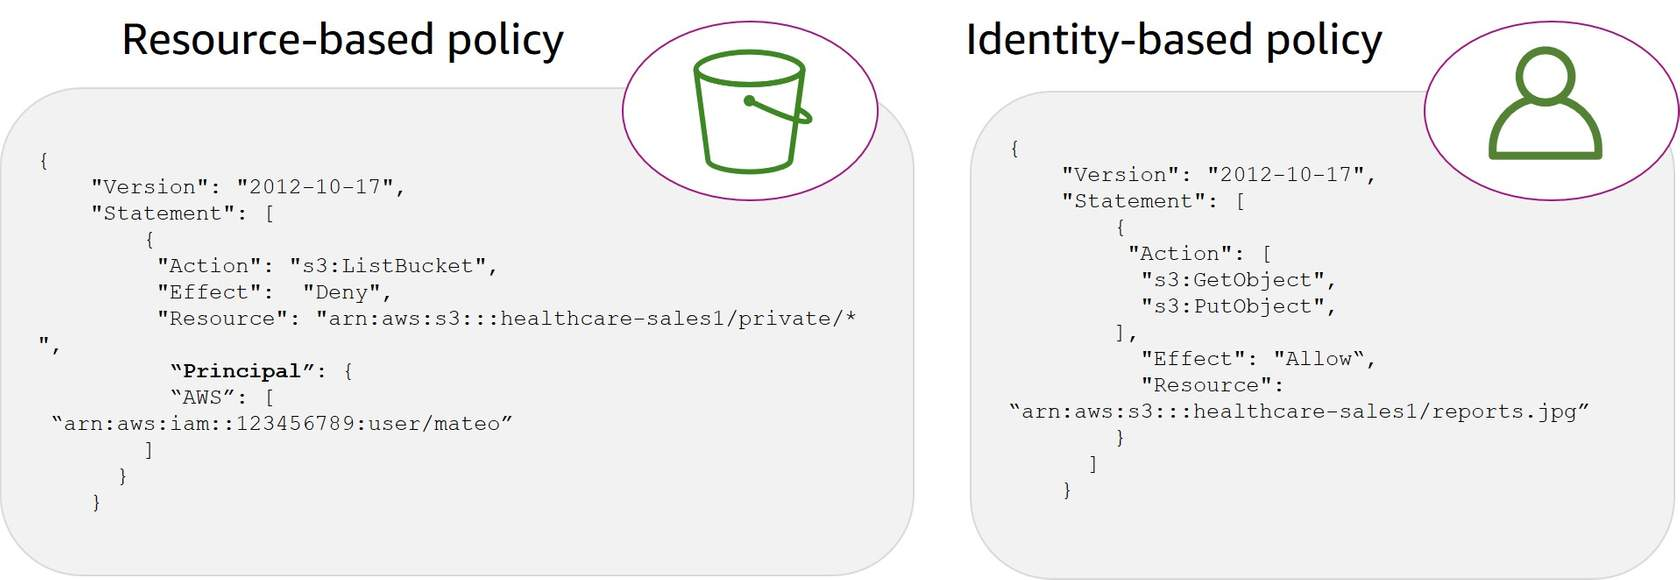



## Limits on policy size

IAM policies define permissions for an action regardless of the method (AWS Management Console, AWS CLI, or AWS API) that you use to perform the operation. For an inline policy, or a policy that's embedded in an IAM identity, the total aggregate policy size (the sum size of all inline policies) per entity cannot exceed the following character quotas:

- User policy size cannot exceed 2,048 characters.
- Role policy size cannot exceed 10,240 characters.
- Group policy size cannot exceed 5,120 characters.

## When to use IAM user policies

Use IAM policies for the following situations:

- You need to control access to AWS services other than Amazon S3. IAM policies provide a more streamlined centralized management all of your permissions.
- You have numerous Amazon S3 buckets, each with different permissions requirements. Fewer IAM policies are easier to manage than having to define a large number of Amazon S3 bucket policies. This way, you can focus on having fewer, more detailed IAM policies.
- You prefer to keep access control policies in the IAM environment.

## Bucket policies

To grant other AWS accounts or IAM users access to the bucket and the objects in it, attach a bucket policy. Because you are granting access to a user or account, a bucket policy must define a principal (which is an account, user, role, or service) entity within the policy. The "Principal" statement is listed in the policy (see the example code). 

When using bucket policies, Amazon S3 is managing the security. Bucket policies supplement and, in many cases, replace legacy ACL-based access policies. Amazon S3 supports a bucket policy size limit of up 20 KB.

Bucket policies grant access to another AWS account or IAM user. Therefore, you must specify the principal, or the user to whom you are granting access, as a "Principal" in the bucket policy.

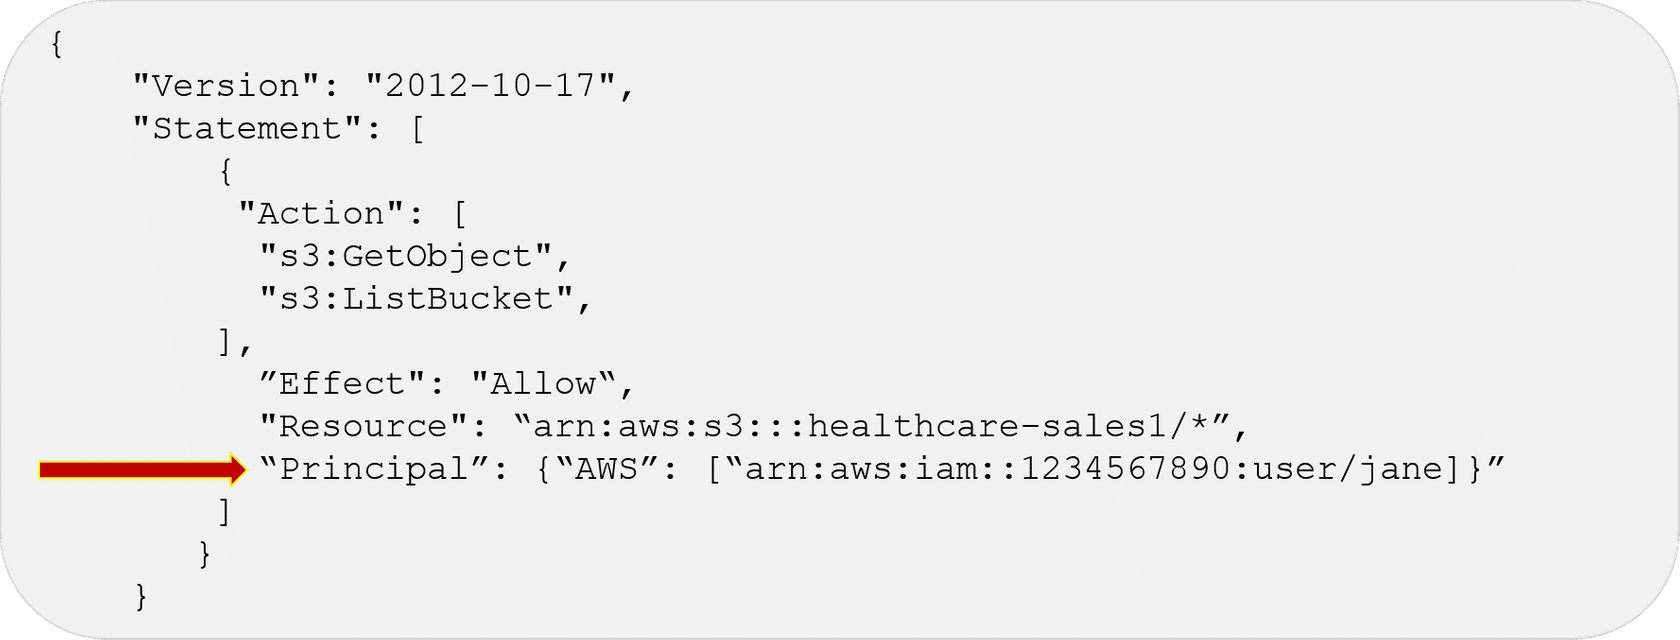



## When to use a bucket policy

Use a bucket policy in the following situations:

- You need to grant cross-account permissions to other AWS accounts or users in another account, without using IAM roles.
- Your IAM policies reach the size limits for users, groups, or roles. 
- You prefer to keep access control policies in the Amazon S3 environment.
- You need to ensure strict access control for sensitive data stored in a specific bucket and do not want access granted inadvertently to unauthorized users via IAM policies

## Access control lists

You can use access control lists (ACLs) to manage access to buckets and objects. Each bucket and object has an ACL attached to it as a subresource. The ACL defines which AWS accounts or groups are granted access and the type of access. When a request is received against a resource, Amazon S3 checks the corresponding ACL to verify that the requester has the necessary access permissions. When you create a bucket or an object, Amazon S3 creates a default ACL that grants the resource owner full control over the resource. 

For cross-account access, use ACLs to control which principals in another account can access a resource. You cannot use ACLs to control access for a principal in the same account. ACLs are similar to resource-based policies, although they are the only policy type that does not use the JSON policy document format. Amazon S3, AWS WAF, and Amazon VPC are examples of services that support ACLs. 

## Access policy elements

JSON policy documents are made up of elements. Each statement in the policy contains required elements, such as Effect, Action, and Resource. In addition to these required elements, the policy can include optional elements as well. The order of the elements doesn't matter—for example, the Resource element can come before the Action element. 

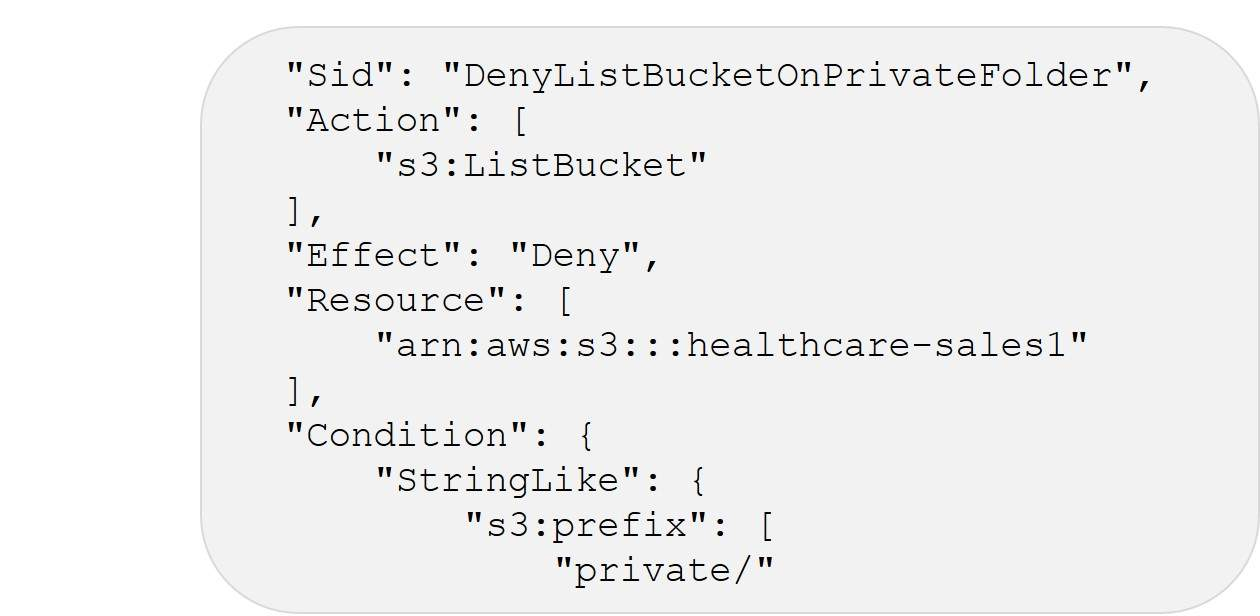


## Effect

The Effect element specifies whether the statement actions are allowed or denied. Valid values for Effect are Allow and Deny. This is a required element. 



The following example allows an action.

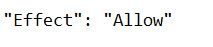

## Action

The Action element defines the actions that the policy allows or denies. This is a required element. 



In the following example, the action allows a user to get and put (read/write) objects in an S3 bucket.

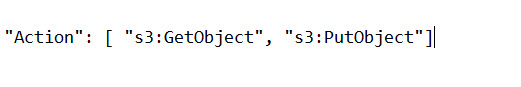

## NotAction

NotAction is an advanced policy element that explicitly matches everything except the specified list of actions. Either Action or NonAction is required in a policy. 



The following example allows users to perform all Amazon S3 actions except for deleting a bucket.

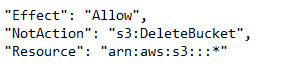

## Principal

The Principal element defines which principal is allowed or denied access to a resource. You cannot use the Principal element in an IAM identity-based policy because, in that case, you are already attaching the policy directly to a principal. This is an optional element. 



In the following example, the principal is a user named mateo.

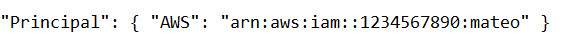

## NotPrincipal

Use the NotPrincipal element to specify the IAM user, federated user, IAM role, AWS account, AWS service, or other principal that is not allowed or denied access to a resource. This is an optional element. 



The following example omits Jane and the root from the list of principals that are explicitly denied.

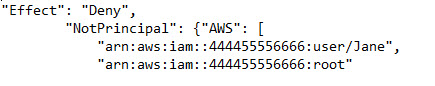

## Resource or NotResource

The Resource and NotResource elements specify the objects (or resources) that the statement covers. Statements must include either a Resource or a NotResource element and must be specified as an Amazon Resource Name (ARN). Resource is a required element in the policy.



In the following example the resource is the /private directory located under the healthcare-sales1 bucket.

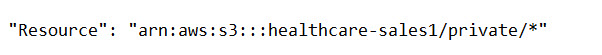

## Condition (Optional)

Use the Condition element (or Condition block) to specify conditions for when a policy is in effect. This is an optional element. 



In the following example, the condition specifies that only the user mateo can make the request.

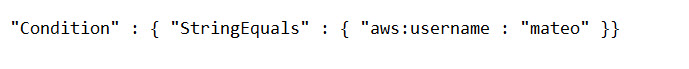



## Jane's policy

```json
  {
    "Version": "2012-10-17",
    "Statement": [
        {
            "Sid": "ViewS3bucketsInConsole",
            "Effect": "Allow",
            "Action": [
                "s3:GetBucketLocation"
            ],
            "Resource": "arn:aws:s3:::healthcare-sales1"
        },
        {
            "Sid": "AllowRootFileview",
            "Effect": "Allow",
            "Action": "s3:ListBucket",
            "Resource": "arn:aws:s3:::healthcare-sales1",
            "Condition": {
                "StringEquals": {
                    "s3:prefix": [
                        "",
                        "goals/"
                    ]
                }
            }
        },
        {
            "Sid": "ReadWriteAccess",
            "Effect": "Allow",
            "Action": [
                "s3:PutObject",
                "s3:GetObject"
            ],
            "Resource": "arn:aws:s3:::healthcare-sales1/goals/*"
        }
    ]
}  
```